Notebook reproducing results from the Wu & Lithwick, 2011 paper

In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Function that calculates the complex conjugate variables

In [3]:
def get_ccv(e,i,pomega,Omega):

        p_e = 2.0*(1.0 - np.sqrt(1.0 - e*e))
        p_i = 4.0*np.sqrt(1.0 - e*e)*np.sin(i/2.0)*np.sin(i/2.0)

        z = np.sqrt(p_e)*np.exp(pomega*1j)
        zeta = np.sqrt(p_i)*np.exp(Omega*1j)

        return z, zeta

Function returning the fourier transform of a CCV and the corresponding frequency in arcsecs/year

In [4]:
def fourier(time,array):

        fft = np.fft.fft(array)

        Npts = len(array)
        spacing_array = time[::-1][:-1][::-1] - time[:-1]

        if np.mean(spacing_array) - spacing_array[0] > 1.e-16:
                print "time axis not equally separated. cannot compute fft"
                sys.exit()
        spacing = spacing_array[0]

        freq = np.fft.fftfreq(Npts, spacing)
        freq = freq*360.*3600. # convert frequency from cycles/years to arcsecs/years

        return freq,fft

Run a test case of filtering with a sample noise signal

ehllo


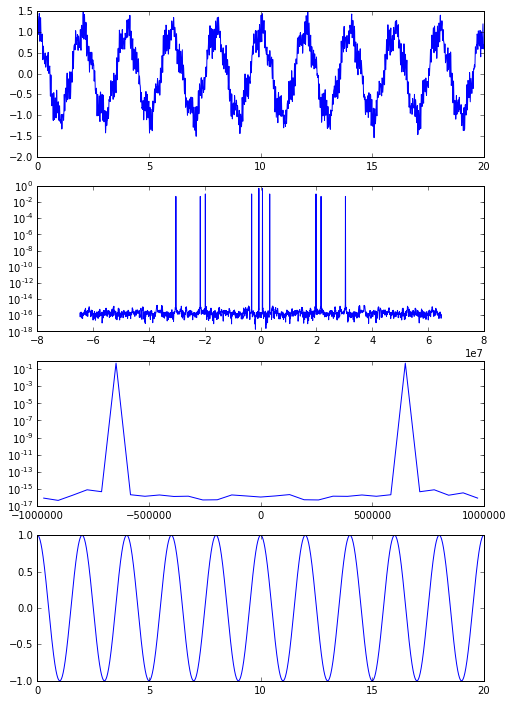

In [5]:
sample_rate = 100.0
nsamples = int(2.e3)
t = np.arange(nsamples) / sample_rate
x = np.cos(2*np.pi*0.5*t) + 0.2*np.sin(2*np.pi*2.5*t+0.1) + \
    0.2*np.sin(2*np.pi*15.3*t) + 0.1*np.sin(2*np.pi*16.7*t + 0.1) + \
    0.1*np.sin(2*np.pi*23.45*t+.8)

x_freq,x_fft = fourier(t,x)

plt.clf()
plt.figure(figsize=(8,12))

plt.subplot(4,1,1) # original signal
plt.plot(t,x)

plt.subplot(4,1,2) # fourier transform
plt.semilogy(sorted(x_freq),[b for (a,b) in sorted(zip(x_freq,np.absolute(x_fft)/nsamples))])

plt.subplot(4,1,3) # fourier transform zoomed at a narrow range
idx = np.where(np.abs(x_freq)<1.e6)
plt.semilogy(sorted(x_freq[idx]),[b for (a,b) in sorted(zip(x_freq[idx],np.absolute(x_fft[idx])/nsamples))])

plt.subplot(4,1,4) # filtered by setting to zero all frequencies except for shortest frequency peak
idx = np.where(np.abs(x_freq) > 7.e5)
x_fft[idx]=0
idx = np.where(np.abs(x_freq) < 5.e5)
x_fft[idx]=0
x_filter = np.fft.ifft(x_fft)
plt.plot(t,np.real(x_filter))
print "ehllo"



Import Mercury's orbital parameters which have gone through a Hanning filter

In [8]:
filename = "mercury_hanning.txt"
data = np.loadtxt(filename)
time = data[:,0]
z = data[:,1] + 1j*data[:,2]
zeta = data[:,3] + 1j*data[:,4]

data loaded


Taking fourier transform of z, zeta

In [22]:
z_freq,z_fft = fourier(time,z)
zeta_freq,zeta_fft = fourier(time,zeta)

Recovering the original values of the orbital parameters 

In [23]:
ecc_m_orig = np.absolute(z)
inc_m_orig = np.absolute(zeta)
pomega_m_orig = np.angle(z)
Omega_m_orig = np.angle(zeta)

Plot of Mercury's FFT before filtering and after filtering

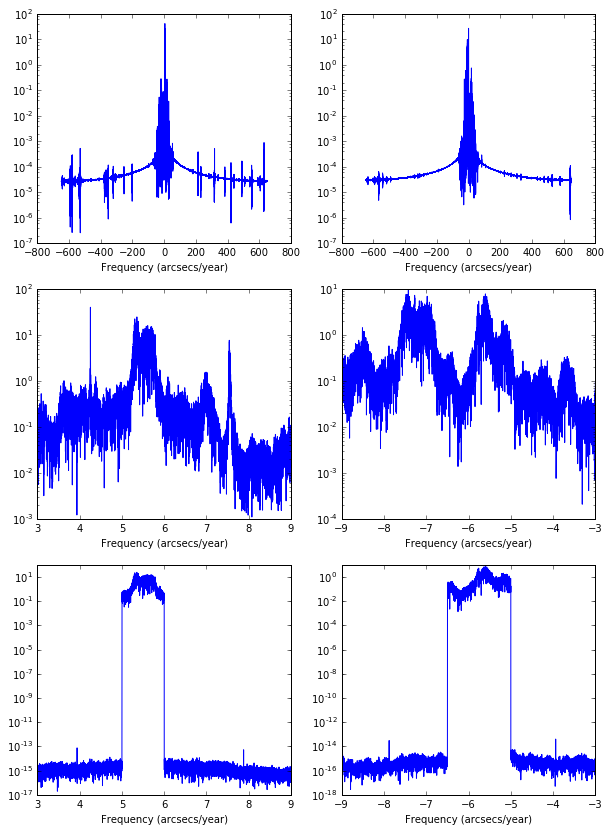

In [24]:
%matplotlib inline
plt.figure(figsize=(10,14))

plt.subplot(3,2,1) # original FFT
plt.xlabel("Frequency (arcsecs/year)")
plt.semilogy(sorted(z_freq),[b for (a,b) in sorted(zip(z_freq,np.absolute(z_fft)/nsamples))])
plt.subplot(3,2,2) # original FFT
plt.xlabel("Frequency (arcsecs/year)")
plt.semilogy(sorted(zeta_freq),[b for (a,b) in sorted(zip(zeta_freq,np.absolute(zeta_fft)/nsamples))])

plt.subplot(3,2,3)
idx = np.logical_and(z_freq>3,z_freq<9)
plt.xlabel("Frequency (arcsecs/year)")
plt.semilogy(sorted(z_freq[idx]),[b for (a,b) in sorted(zip(z_freq[idx],np.absolute(z_fft[idx])/nsamples))])

plt.subplot(3,2,4)
idx = np.logical_and(z_freq>-9,z_freq<-3)
plt.xlabel("Frequency (arcsecs/year)")
plt.semilogy(sorted(zeta_freq[idx]),[b for (a,b) in sorted(zip(zeta_freq[idx],np.absolute(zeta_fft[idx])/nsamples))])

filt_index = np.where(z_freq<5)
z_fft[filt_index] = 0
filt_index = np.where(z_freq>6)
z_fft[filt_index]=0
z_filter = np.fft.ifft(z_fft)

filt_index = np.where(zeta_freq<-6.5)
zeta_fft[filt_index] = 0
filt_index = np.where(zeta_freq>-5)
zeta_fft[filt_index]=0
zeta_filter = np.fft.ifft(zeta_fft)

z_freq,z_fft = fourier(time,z_filter)
zeta_freq,zeta_fft = fourier(time,zeta_filter)

idx = np.logical_and(z_freq>3,z_freq<9)
plt.subplot(3,2,5) # original FFT
plt.xlabel("Frequency (arcsecs/year)")
plt.semilogy(sorted(z_freq[idx]),[b for (a,b) in sorted(zip(z_freq[idx],np.absolute(z_fft[idx])/nsamples))])
idx = np.logical_and(z_freq>-9,z_freq<-3)
plt.subplot(3,2,6) # original FFT
plt.xlabel("Frequency (arcsecs/year)")
plt.semilogy(sorted(zeta_freq[idx]),[b for (a,b) in sorted(zip(zeta_freq[idx],np.absolute(zeta_fft[idx])/nsamples))])

Calculating Mercury's filtered orbital parameters

In [25]:
ecc_m_filt = np.absolute(z_filter)
pomega_m_filt = np.angle(z_filter)
inc_m_filt = np.absolute(zeta_filter)
Omega_m_filt = np.angle(zeta_filter)

Same analysis for Venus' zeta

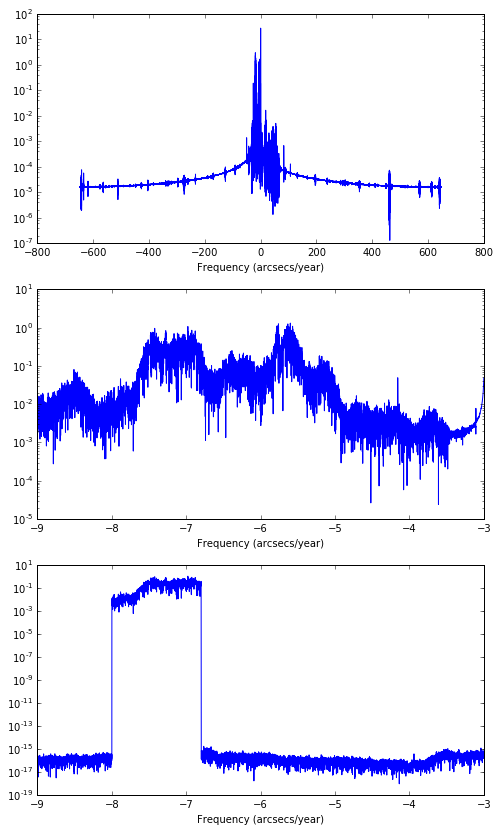

In [26]:
filename = "venus_hanning.txt"
data = np.loadtxt(filename)
time = data[:,0]
z = data[:,1] + 1j*data[:,2]
zeta = data[:,3] + 1j*data[:,4]

zeta_freq,zeta_fft = fourier(time,zeta)

%matplotlib inline
plt.figure(figsize=(8,14))

plt.subplot(3,1,1) # original FFT
plt.xlabel("Frequency (arcsecs/year)")
plt.semilogy(sorted(zeta_freq),[b for (a,b) in sorted(zip(zeta_freq,np.absolute(zeta_fft)/nsamples))])

plt.subplot(3,1,2)
idx = np.logical_and(zeta_freq>-9,zeta_freq<-3)
plt.xlabel("Frequency (arcsecs/year)")
plt.semilogy(sorted(zeta_freq[idx]),[b for (a,b) in sorted(zip(zeta_freq[idx],np.absolute(zeta_fft[idx])/nsamples))])

filt_index = np.where(zeta_freq<-8)
zeta_fft[filt_index] = 0
filt_index = np.where(zeta_freq>-6.8)
zeta_fft[filt_index]=0
zeta_filter = np.fft.ifft(zeta_fft)

Omega_v_filt = np.angle(zeta_filter)

zeta_freq,zeta_fft = fourier(time,zeta_filter)

idx = np.logical_and(zeta_freq>-9,zeta_freq<-3)
plt.subplot(3,1,3) # original FFT
plt.xlabel("Frequency (arcsecs/year)")
plt.semilogy(sorted(zeta_freq[idx]),[b for (a,b) in sorted(zip(zeta_freq[idx],np.absolute(zeta_fft[idx])/nsamples))])

Same analysis on Jupiter's z

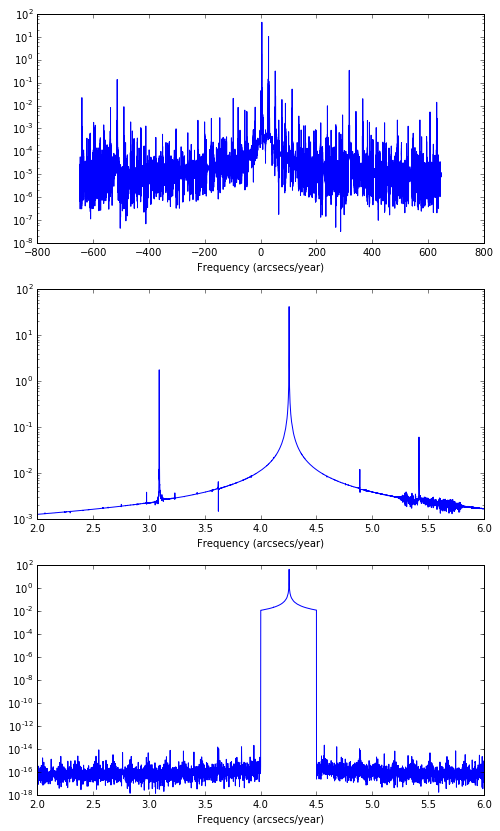

In [28]:
filename = "jupiter_hanning.txt"
data = np.loadtxt(filename)
time = data[:,0]
z = data[:,1] + 1j*data[:,2]
zeta = data[:,3] + 1j*data[:,4]

z_freq,z_fft = fourier(time,z)

%matplotlib inline
plt.figure(figsize=(8,14))

plt.subplot(3,1,1) # original FFT
plt.xlabel("Frequency (arcsecs/year)")
plt.semilogy(sorted(z_freq),[b for (a,b) in sorted(zip(z_freq,np.absolute(z_fft)/nsamples))])

plt.subplot(3,1,2)
idx = np.logical_and(z_freq>2,z_freq<6)
plt.xlabel("Frequency (arcsecs/year)")
plt.semilogy(sorted(z_freq[idx]),[b for (a,b) in sorted(zip(z_freq[idx],np.absolute(z_fft[idx])/nsamples))])

filt_index = np.where(z_freq>4.5)
z_fft[filt_index] = 0
filt_index = np.where(z_freq<4)
z_fft[filt_index]=0
z_filter = np.fft.ifft(z_fft)

pomega_j_filt = np.angle(z_filter)

z_freq,z_fft = fourier(time,z_filter)

idx = np.logical_and(z_freq>2,z_freq<6)
plt.subplot(3,1,3) # original FFT
plt.xlabel("Frequency (arcsecs/year)")
plt.semilogy(sorted(z_freq[idx]),[b for (a,b) in sorted(zip(z_freq[idx],np.absolute(z_fft[idx])/nsamples))])

Calculating angle combinations

In [29]:
angle_1m1 = (pomega_m_filt - pomega_j_filt) - (Omega_m_filt - Omega_v_filt)
angle_1p1 = (pomega_m_filt - pomega_j_filt) + (Omega_m_filt - Omega_v_filt)
angle_2m1 = 2.0*(pomega_m_filt - pomega_j_filt) - (Omega_m_filt - Omega_v_filt)
angle_3m2 = 3.0*(pomega_m_filt - pomega_j_filt) - 2.0*(Omega_m_filt - Omega_v_filt)
angle_4m3 = 4.0*(pomega_m_filt - pomega_j_filt) - 3.0*(Omega_m_filt - Omega_v_filt)
angle_5m4 = 5.0*(pomega_m_filt - pomega_j_filt) - 4.0*(Omega_m_filt - Omega_v_filt)

Plotting free parameters

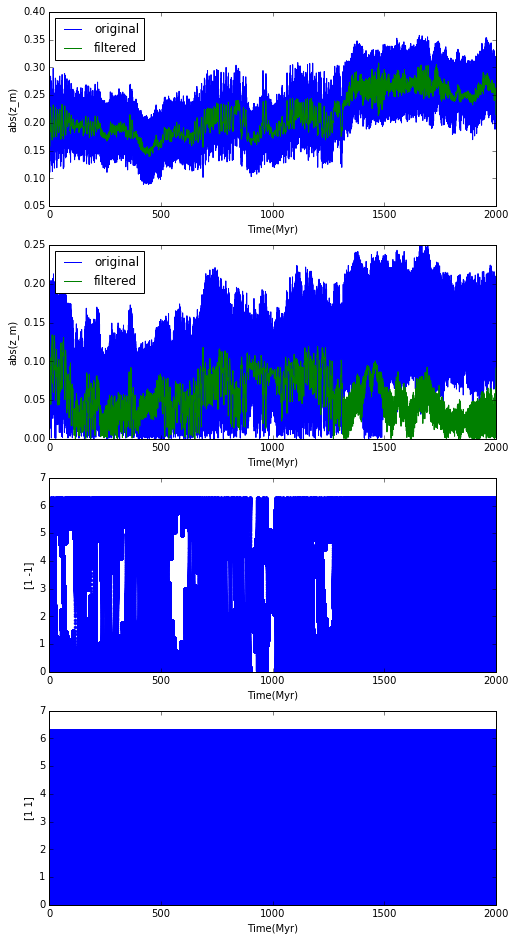

In [30]:
plt.clf()
plt.figure(figsize=(8,16))
plt.subplot(4,1,1)
plt.xlabel("Time(Myr)")
plt.ylabel("abs(z_m)")
plt.plot(time/1.e6,ecc_m_orig,label="original")
plt.plot(time/1.e6,ecc_m_filt,label="filtered")
plt.legend(loc="best")
plt.subplot(4,1,2)
plt.xlabel("Time(Myr)")
plt.ylabel("abs(z_m)")
plt.plot(time/1.e6,inc_m_orig,label="original")
plt.plot(time/1.e6,inc_m_filt,label="filtered")
plt.legend(loc="best")
plt.subplot(4,1,3)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 -1]")
plt.plot(time/1.e6,angle_1m1%(2.*np.pi),'.')
plt.subplot(4,1,4)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 1]")
plt.plot(time/1.e6,angle_1p1%(2.*np.pi),'.')

Plotting [1,-1] and [1,1] angle combinations with various spacings

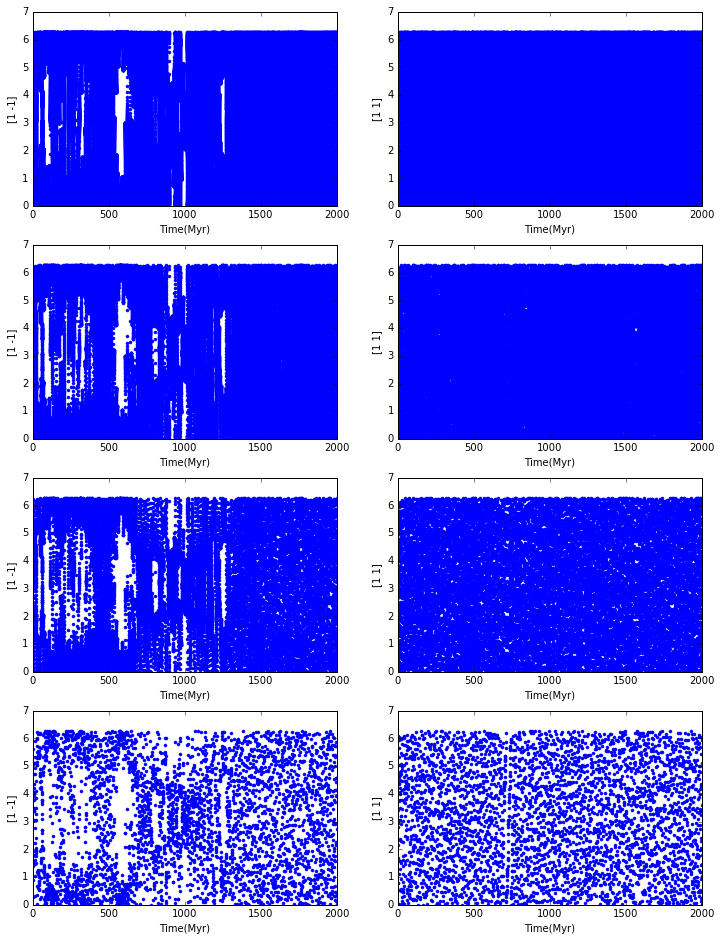

In [42]:
plt.clf()
plt.figure(figsize=(12,16))

plt.subplot(4,2,1)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 -1]")
#plt.plot(time[::10]/1.e6,angle_1m1[::10],'.')
plt.plot(time[::10]/1.e6,angle_1m1[::10]%(2.*np.pi),'.')
plt.subplot(4,2,2)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 1]")
#plt.plot(time[::10]/1.e6,angle_1p1[::10],'.')
plt.plot(time[::10]/1.e6,angle_1p1[::10]%(2.*np.pi),'.')
plt.subplot(4,2,3)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 -1]")
#plt.plot(time[::50]/1.e6,angle_1m1[::50],'.')
plt.plot(time[::50]/1.e6,angle_1m1[::50]%(2.*np.pi),'.')
plt.subplot(4,2,4)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 1]")
#plt.plot(time[::50]/1.e6,angle_1p1[::50],'.')
plt.plot(time[::50]/1.e6,angle_1p1[::50]%(2.*np.pi),'.')
plt.subplot(4,2,5)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 -1]")
#plt.plot(time[::100]/1.e6,angle_1m1[::100],'.')
plt.plot(time[::100]/1.e6,angle_1m1[::100]%(2.*np.pi),'.')
plt.subplot(4,2,6)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 1]")
#plt.plot(time[::100]/1.e6,angle_1p1[::100],'.')
plt.plot(time[::100]/1.e6,angle_1p1[::100]%(2.*np.pi),'.')
plt.subplot(4,2,7)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 -1]")
#plt.plot(time[::500]/1.e6,angle_1m1[::500],'.')
plt.plot(time[::500]/1.e6,angle_1m1[::500]%(2.*np.pi),'.')
plt.subplot(4,2,8)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 1]")
#plt.plot(time[::500]/1.e6,angle_1p1[::500],'.')
plt.plot(time[::500]/1.e6,angle_1p1[::500]%(2.*np.pi),'.')

Same as above but zoomed between 500 and 1000 Myr

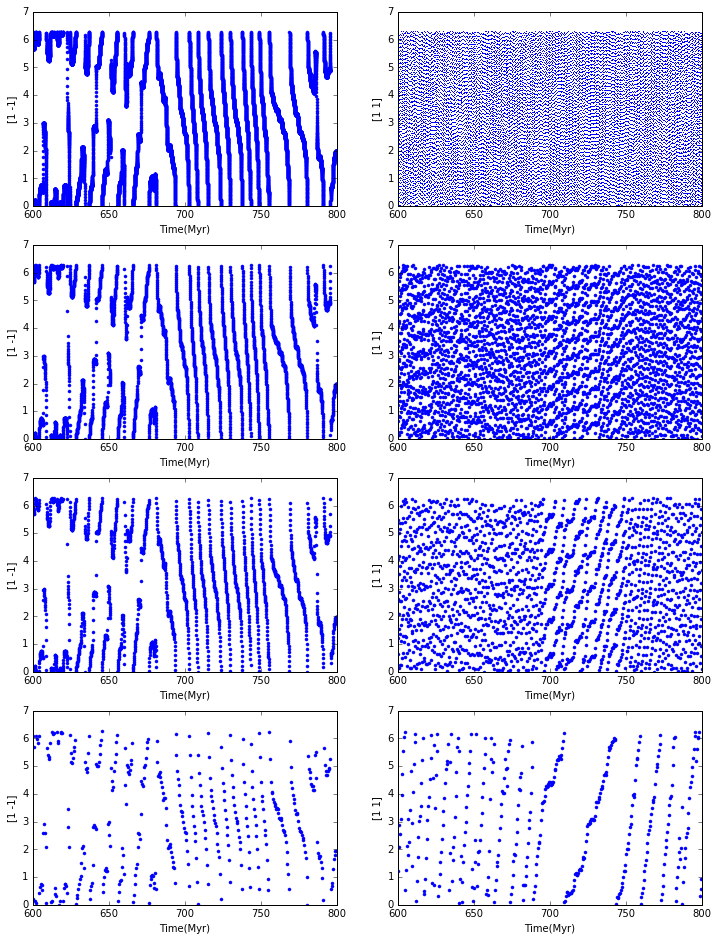

In [76]:
idx = np.logical_and(time>6.e8,time<8.e8)

plt.clf()
plt.figure(figsize=(12,16))

plt.subplot(4,2,1)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 -1]")
#plt.plot(time[idx][::1]/1.e6,angle_1m1[idx][::1],',')
plt.plot(time[idx][::10]/1.e6,angle_1m1[idx][::10]%(2.*np.pi),'.')
plt.subplot(4,2,2)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 1]")
#plt.plot(time[idx][::10]/1.e6,angle_1p1[idx][::10],'.')
plt.plot(time[idx][::10]/1.e6,angle_1p1[idx][::10]%(2.*np.pi),',')
plt.subplot(4,2,3)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 -1]")
#plt.plot(time[idx][::50]/1.e6,angle_1m1[idx][::50],'.')
plt.plot(time[idx][::50]/1.e6,angle_1m1[idx][::50]%(2.*np.pi),'.')
plt.subplot(4,2,4)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 1]")
#plt.plot(time[idx][::50]/1.e6,angle_1p1[idx][::50],'.')
plt.plot(time[idx][::50]/1.e6,angle_1p1[idx][::50]%(2.*np.pi),'.')
plt.subplot(4,2,5)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 -1]")
#plt.plot(time[idx][::100]/1.e6,angle_1m1[idx][::100],'.')
plt.plot(time[idx][::100]/1.e6,angle_1m1[idx][::100]%(2.*np.pi),'.')
plt.subplot(4,2,6)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 1]")
#plt.plot(time[idx][::100]/1.e6,angle_1p1[idx][::100],'.')
plt.plot(time[idx][::100]/1.e6,angle_1p1[idx][::100]%(2.*np.pi),'.')
plt.subplot(4,2,7)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 -1]")
#plt.plot(time[idx][::500]/1.e6,angle_1m1[idx][::500],'.')
plt.plot(time[idx][::500]/1.e6,angle_1m1[idx][::500]%(2.*np.pi),'.')
plt.subplot(4,2,8)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 1]")
#plt.plot(time[idx][::500]/1.e6,angle_1p1[idx][::500],'.')
plt.plot(time[idx][::500]/1.e6,angle_1p1[idx][::500]%(2.*np.pi),'.')

Plotting different angle combinations

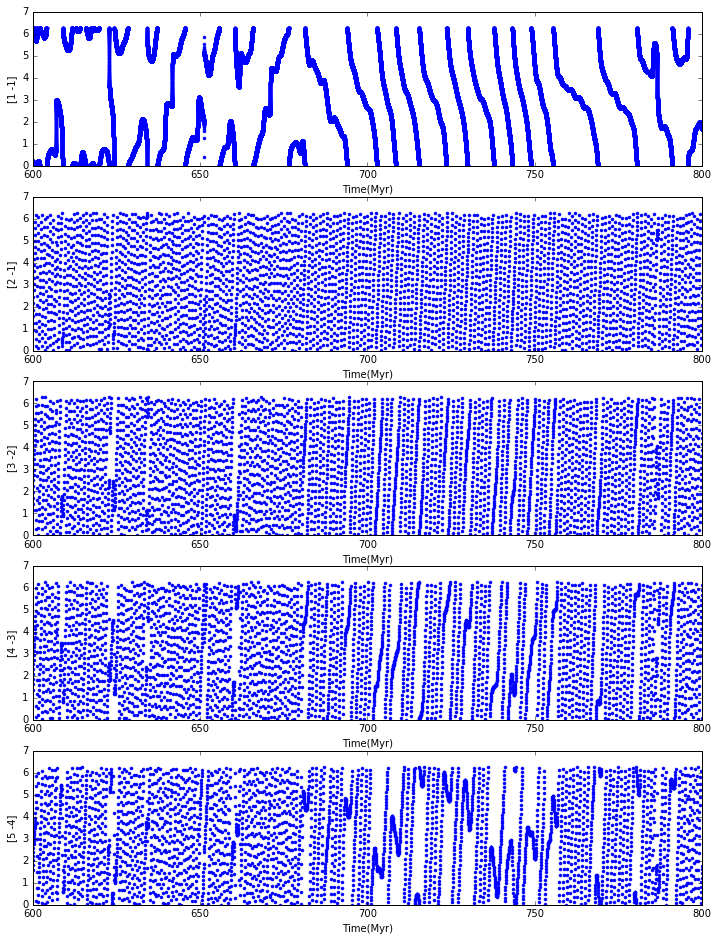

In [67]:
index = np.logical_and(time>6.e8,time<8.e8)

plt.clf()
plt.figure(figsize=(12,16))
plt.subplot(5,1,1)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 -1]")
plt.plot(time[index][::1]/1.e6,angle_1m1[index][::1]%(2.*np.pi),'.')
plt.subplot(5,1,2)
plt.xlabel("Time(Myr)")
plt.ylabel("[2 -1]")
plt.plot(time[index][::50]/1.e6,angle_2m1[index][::50]%(2.*np.pi),'.')
plt.subplot(5,1,3)
plt.xlabel("Time(Myr)")
plt.ylabel("[3 -2]")
plt.plot(time[index][::50]/1.e6,angle_3m2[index][::50]%(2.*np.pi),'.')
plt.subplot(5,1,4)
plt.xlabel("Time(Myr)")
plt.ylabel("[4 -3]")
plt.plot(time[index][::50]/1.e6,angle_4m3[index][::50]%(2.*np.pi),'.')
plt.subplot(5,1,5)
plt.xlabel("Time(Myr)")
plt.ylabel("[5 -4]")
plt.plot(time[index][::50]/1.e6,angle_5m4[index][::50]%(2.*np.pi),'.')

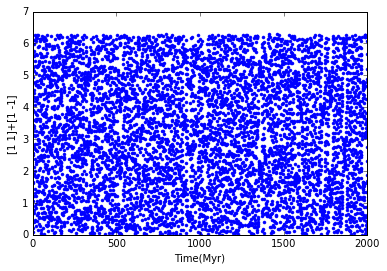

In [68]:
plt.xlabel("Time(Myr)")
plt.ylabel("[1 1]+[1 -1]")
plt.plot(time[::300]/1.e6,(angle_1m1+angle_1p1)[::300]%(2.*np.pi),'.')

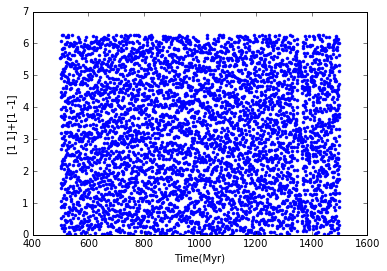

In [69]:
idx = np.logical_and(time>5.e8,time<1.5e9)
plt.clf()
plt.xlabel("Time(Myr)")
plt.ylabel("[1 1]+[1 -1]")
plt.plot(time[idx][::200]/1.e6,(angle_1m1+angle_1p1)[idx][::200]%(2.*np.pi),'.')

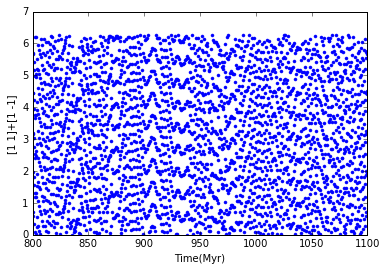

In [70]:
idx = np.logical_and(time>8.e8,time<1.1e9)
plt.clf()
plt.xlabel("Time(Myr)")
plt.ylabel("[1 1]+[1 -1]")
plt.plot(time[idx][::100]/1.e6,(angle_1m1+angle_1p1)[idx][::100]%(2.*np.pi),'.')

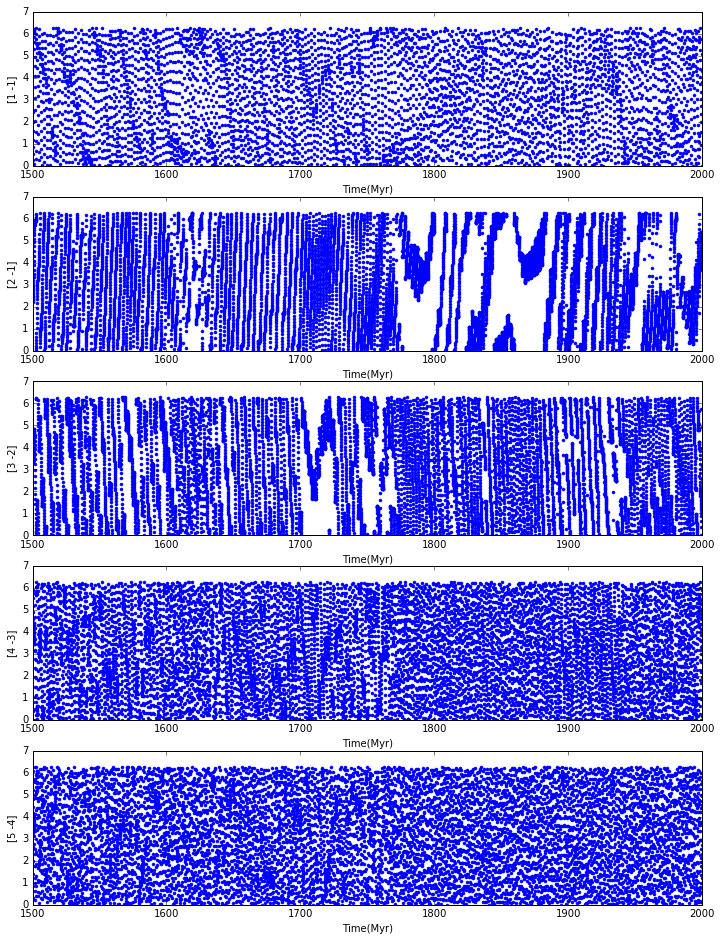

In [73]:
index = np.logical_and(time>1.5e9,time<2.e9)

plt.clf()
plt.figure(figsize=(12,16))
plt.subplot(5,1,1)
plt.xlabel("Time(Myr)")
plt.ylabel("[1 -1]")
plt.plot(time[index][::100]/1.e6,angle_1m1[index][::100]%(2.*np.pi),'.')
plt.subplot(5,1,2)
plt.xlabel("Time(Myr)")
plt.ylabel("[2 -1]")
plt.plot(time[index][::50]/1.e6,angle_2m1[index][::50]%(2.*np.pi),'.')
plt.subplot(5,1,3)
plt.xlabel("Time(Myr)")
plt.ylabel("[3 -2]")
plt.plot(time[index][::50]/1.e6,angle_3m2[index][::50]%(2.*np.pi),'.')
plt.subplot(5,1,4)
plt.xlabel("Time(Myr)")
plt.ylabel("[4 -3]")
plt.plot(time[index][::50]/1.e6,angle_4m3[index][::50]%(2.*np.pi),'.')
plt.subplot(5,1,5)
plt.xlabel("Time(Myr)")
plt.ylabel("[5 -4]")
plt.plot(time[index][::50]/1.e6,angle_5m4[index][::50]%(2.*np.pi),'.')